<a href="https://colab.research.google.com/github/varsita-yeddula/AIML_Learnings/blob/main/STP_Module_3_Lab_3_Using_KNN_for_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE: CLASSIFICATION-1
### LAB-3 : Using KNN for Text Classification


---

## **Section 1: Understanding NLP tools**

In this lab we will be using KNN on a real world NLP application i.e. is text classification. But first look at some NLP techniques for text classification and tools that we use when we want to use python for NLP.

## Section 1.2: Data Cleaning and Preprocessing step

Raw text must be processed and converted into a form so that it is suitable to use with various machine-learning algorithms.  
In case of text, there are lots of things that need to be taken into account.  


1.   Removing numbers from the text
2.   Handling capitalization and punctuation.
3.   Stemming and Lemmatizing text.  

And most importantly, one can't just use words or images directly in algorithms; they need to be converted into vectors- a form that algorithms can understand.



### **NLTK**
NLTK (or Natural Language Tool Kit) is a commonly used library for processing text. We will use this tool in this lab. Lets first install it.


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
import re
import numpy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup

def cleanText(text, lemmatize, stemmer):
    """Method for cleaning text from train and test data. Removes numbers, punctuation, and capitalization. Stems or lemmatizes text."""

    if isinstance(text, float):
        text = str(text)
    if isinstance(text, numpy.int64):
        text = str(text)
    try:
        text = text.decode()
    except AttributeError:
        pass

    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()
    text = re.sub(r"[^A-Za-z]", " ", text)
    text = text.lower()


    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()

        def get_tag(tag):
            if tag.startswith('J'):
                return wordnet.ADJ
            elif tag.startswith('V'):
                return wordnet.VERB
            elif tag.startswith('N'):
                return wordnet.NOUN
            elif tag.startswith('R'):
                return wordnet.ADV
            else:
                return ''

        text_result = []
        tokens = word_tokenize(text)  # Generate list of tokens
        tagged = pos_tag(tokens)
        for t in tagged:
            try:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0], get_tag(t[1][:2])))
            except:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0]))
        return text_result

    if stemmer:
        text_result = []
        tokens = word_tokenize(text)
        snowball_stemmer = SnowballStemmer('english')
        for t in tokens:
            text_result.append(snowball_stemmer.stem(t))
        return text_result

In [4]:
sample_text = "Troubling"
sample_text_result = cleanText(sample_text, lemmatize=False, stemmer=True)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text)
print(sample_text_result)
sample_text_result = cleanText(sample_text, lemmatize=True, stemmer=False)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text_result)

Troubling
troubl
trouble


## Section 1.2: BAG OF WORDS

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in many ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [ ]:
5*12

60

In [5]:
# Functions to convert document(s) to a list of words, with the option of removing stopwords. Returns document-term matrix.

def createBagOfWords(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = CountVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer = CountVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    bag_of_words_train = vectorizer.fit_transform(clean_train).toarray()
    bag_of_words_test = vectorizer.transform(clean_test).toarray()
    return bag_of_words_train, bag_of_words_test


In [6]:
# Visualize how Bag of Words works with a simple example
from sklearn.feature_extraction.text import CountVectorizer

sample_sentences = [
    "I love this movie",
    "This movie is great",
    "I hate this movie"
]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sample_sentences)

print("Vocabulary (unique words):", vectorizer.get_feature_names_out())
print("\nBag of Words Matrix:")
print(bow_matrix.toarray())
print("\nEach row represents a sentence, each column represents a word count")

Vocabulary (unique words): ['great' 'hate' 'is' 'love' 'movie' 'this']

Bag of Words Matrix:
[[0 0 0 1 1 1]
 [1 0 1 0 1 1]
 [0 1 0 0 1 1]]

Each row represents a sentence, each column represents a word count


## Section 1.3: TF-IDF
TF-IDF technique is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

The number of times a term occurs in a document is called its Term frequency (TF).

 Document frequency is the number of documents in which the word is present.  Inverse DF (IDF) is the inverse of the document frequency which measures the informativeness of term *t*.




In [7]:
def createTFIDF(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = TfidfVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    tfidf_train = vectorizer.fit_transform(clean_train).toarray()
    tfidf_test = vectorizer.transform(clean_test).toarray()
    return tfidf_train, tfidf_test

In [8]:
# Compare BoW vs TF-IDF on the same example
from sklearn.feature_extraction.text import TfidfVectorizer

sample_sentences = [
    "I love this movie",
    "This movie is great",
    "I hate this movie"
]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_sentences)

print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\nNotice: Common words like 'movie' have lower scores")
print("Unique words like 'love', 'hate', 'great' have higher scores")

TF-IDF Matrix:
[[0.         0.         0.         0.76749457 0.45329466 0.45329466]
 [0.6088451  0.         0.6088451  0.         0.35959372 0.35959372]
 [0.         0.76749457 0.         0.         0.45329466 0.45329466]]

Notice: Common words like 'movie' have lower scores
Unique words like 'love', 'hate', 'great' have higher scores


# **Section 2: UNDERSTANDING THE DATA : A REVIEWS DATASET**

Sentiment analysis is the interpretation and classification of emotions (such as positive, negative and neutral) within text data using text analysis techniques.  
Given below is a dataset consisting of reviews along with sentiment class (positive or negative).

In [9]:
# Upload the Reviews CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [10]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [11]:
df = df.dropna()

In [12]:
df

,sentence,sentiment
0,This movie was excellent and I loved it,1
1,"Terrible film, waste of time",0
2,Amazing performance by the actors,1
3,Boring and predictable plot,0
4,One of the best movies I've seen,1
...,...,...
995,Completely disappointed with this movie,0
996,Fantastic storyline and direction,1
997,Poor acting and bad script,0
998,"Highly recommended, must watch",1


In [13]:
df.to_csv('reviews.csv', index=False)

In [14]:
# Explore the dataset to understand its structure
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nClass Distribution:")
print(df['sentiment'].value_counts())

print("\nSample Reviews:")
for i in range(3):
    print(f"\nReview {i+1}: {df['sentence'].iloc[i]}")
    print(f"Sentiment: {df['sentiment'].iloc[i]}")

Dataset Shape: (1000, 2)

First few rows:
                                  sentence  sentiment
0  This movie was excellent and I loved it          1
1             Terrible film, waste of time          0
2        Amazing performance by the actors          1
3              Boring and predictable plot          0
4         One of the best movies I've seen          1

Class Distribution:
sentiment
1    500
0    500
Name: count, dtype: int64

Sample Reviews:

Review 1: This movie was excellent and I loved it
Sentiment: 1

Review 2: Terrible film, waste of time
Sentiment: 0

Review 3: Amazing performance by the actors
Sentiment: 1


# **Section 3: KNN MODEL**

Given below are two KNN models; in the first case we are using Bag-of-Words and in the second case we are using TF-IDF.
Note the different metrics and parameters used in each.

In [15]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 1: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

Note: Cross-validation will be discussed in detail in the upcoming lab session.

In [16]:
## KNN accuracy after using BoW
predicted, y_test = bow_knn()

KNN with BOW accuracy = 100.0%
Cross Validation Accuracy: 1.00
[1. 1. 1.]




In [17]:
## KNN accuracy after using TFIDF
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 100.0%
Cross Validation Accuracy: 1.00
[1. 1. 1.]


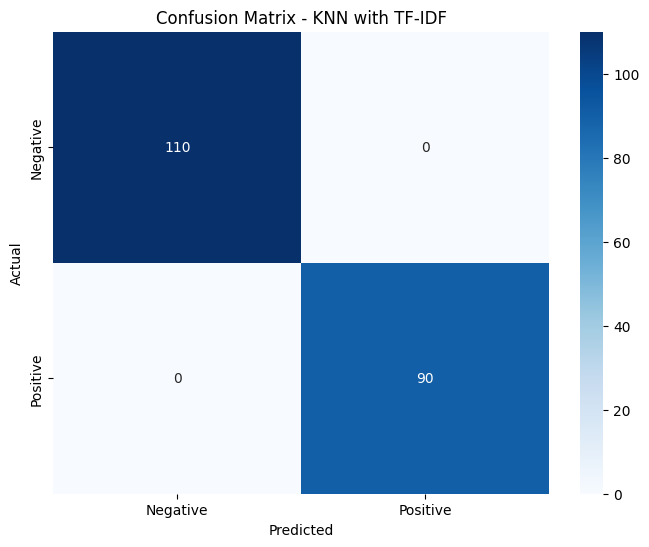


Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       110
    Positive       1.00      1.00      1.00        90

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [18]:
# Visualize model performance with confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, predicted)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - KNN with TF-IDF')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nDetailed Classification Report:")
print(classification_report(y_test, predicted, target_names=['Negative', 'Positive']))

# Section 4: SPAM TEXT DATASET
Now let's use what we've learnt to classify texts as spam or not spam.

In [19]:
# Upload the spam text data CSV file that has been shared with you. You can also download the file from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [20]:
import pandas as pd

# Load spam.csv with encoding fix
df = pd.read_csv('spam.csv', encoding='latin-1')

# Many spam datasets have extra unnamed columns, so we'll select only the first 2
if df.shape[1] > 2:
    df = df.iloc[:, :2]  # Keep only first 2 columns

# Rename columns to standard names
df.columns = ['Category', 'Message']

# Remove any missing values
df = df.dropna()

# Display dataset info
print(f"✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nCategory distribution:")
print(df['Category'].value_counts())
print("\nFirst 5 rows:")
df.head()

✓ Dataset loaded successfully!
Shape: (5572, 2)
Columns: ['Category', 'Message']

Category distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64

First 5 rows:


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [22]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
len(df)

5572

In [24]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 2: Tweak the models below and see results with different parameters

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbors."""

    # Load data with proper encoding
    training_data = pd.read_csv('spam.csv', encoding='latin-1')

    # Clean the data - keep only first 2 columns if there are more
    if training_data.shape[1] > 2:
        training_data = training_data.iloc[:, :2]
    training_data.columns = ['Category', 'Message']
    training_data = training_data.dropna()

    # Map categories to numeric
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        training_data["Message"],
        training_data["Category"],
        test_size=0.2,
        random_state=0
    )

    # Create Bag of Words features
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True,
                                        lemmatize=True, stemmer=False)

    # Train KNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform',
                                          metric='euclidean')
    knn.fit(X_train, y_train)

    # Make predictions
    predicted = knn.predict(X_test)

    # Calculate accuracy
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    # Cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')

    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbors."""

    # Load data with proper encoding
    training_data = pd.read_csv('spam.csv', encoding='latin-1')

    # Clean the data - keep only first 2 columns if there are more
    if training_data.shape[1] > 2:
        training_data = training_data.iloc[:, :2]
    training_data.columns = ['Category', 'Message']
    training_data = training_data.dropna()

    # Map categories to numeric
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        training_data["Message"],
        training_data["Category"],
        test_size=0.2,
        random_state=0
    )

    # Create TF-IDF features
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True,
                                   lemmatize=True, stemmer=False)

    # Train KNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance',
                                          metric='cosine', metric_params=None)
    knn.fit(X_train, y_train)

    # Make predictions
    predicted = knn.predict(X_test)

    # Calculate accuracy
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    # Cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)

    return predicted, y_test

In [25]:
# This cell may take some time to run
predicted, y_test = bow_knn()

KNN with BOW accuracy = 90.94170403587444%
Cross Validation Accuracy: 0.91
[0.91049798 0.91318977 0.90505051]




In [26]:
# This cell may take some time to run
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 96.7713004484305%
Cross Validation Accuracy: 0.97
[0.97106326 0.9730821  0.97037037]


### Questions to Think About and Answer
1. Why does the TF-IDF approach generally result in a better accuracy than Bag-of-Words ?
2. Can you think of techniques that are better than both BoW and TF-IDF ?
3. Read about Stemming and Lemmatization from the resources given below. Think about the pros/cons of each.

**Answers**

1. TF-IDF results in a better accuracy than Bag-of-Words because TF-IDF calculates both term frequency and inverse document frequency which can signify the importance of a word in the given document and in the entire data unlike bag-of-words which can only show the frequency of the term in a given document and cannot find the importance of the given document in the entire data

2. Other techniques that might give better results than both BoW and TF-IDF are N-grams and word vectors. N-grams can learn the context of the words based on the previous words unlike BoW and TF-IDF which only deals with frequencies and not the order of the words.
Word Vectors might work the best as they are standarized embeddings calculated based on huge corpus of data

3. **Pros of Stemming**:
- It is easy to implement and does not depend on the language
- It is faster

  **Cons of Stemming**:
- It can result in words with no real meaning

  **Pros of Lemmatization**:
- It always results in meaningful words
- It is context-aware

   **Cons of Lemmatization**:
- It is complex and takes time


### Useful Resources for further reading
1. Stemming and Lemmatization: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. TF-IDF and BoW : https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
3. TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
